In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# download the dataset from:
# "http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
cover_type = fetch_covtype() 

In [3]:
X = cover_type.data
y = cover_type.target
X.shape, y.shape

((581012, 54), (581012,))

### From [previous EDA](https://github.com/adamszabunio/Forest_Cover_Type/tree/master/EDA) and [model fitting](https://github.com/adamszabunio/Forest_Cover_Type/tree/master/Random_Forests), I explore these 54 features in depth. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
clf.feature_importances_

array([  2.53513060e-01,   4.88698897e-02,   3.22304442e-02,
         5.90138004e-02,   5.68980223e-02,   1.11753647e-01,
         4.20825742e-02,   4.40880463e-02,   4.14366616e-02,
         1.08989377e-01,   1.07935917e-02,   4.87316596e-03,
         1.31959772e-02,   3.57050507e-02,   5.61718943e-04,
         1.02728278e-02,   2.52354782e-03,   1.13714386e-02,
         3.20264949e-04,   8.69382511e-04,   2.62007272e-06,
         4.12849516e-05,   1.07910635e-04,   1.34347644e-02,
         2.56208125e-03,   7.90834607e-03,   4.69337526e-03,
         3.14527617e-04,   5.20758651e-06,   7.79932129e-04,
         1.77923564e-03,   1.69022262e-04,   9.81574911e-04,
         1.87223424e-03,   6.56732031e-04,   1.31253665e-02,
         9.22047209e-03,   4.31072160e-03,   1.96924804e-04,
         2.40300533e-04,   5.76739160e-04,   1.99182014e-04,
         5.31477389e-03,   3.56296885e-03,   4.63871470e-03,
         6.10080203e-03,   4.36402929e-03,   5.49571239e-04,
         1.39500971e-03,

In [7]:
# using only 10 trees, we are able to predict with a very high accuracy
clf.score(X_test, y_test)

0.93733505794486116

In [8]:
def srted_index(feature_importances):
    idx_lst = []
    for i, feat in enumerate(feature_importances):
        idx_lst.append([feat, i+1])
    return sorted(idx_lst, reverse=True)

In [9]:
feat_imp = srted_index(clf.feature_importances_)
feat_imp_df = pd.DataFrame(feat_imp, columns=["Feature Importance Score", "Feature"])
feat_imp_df.set_index("Feature", inplace=True)
feat_imp_df.head()

,Feature Importance Score
Feature,
1,0.253513
6,0.111754
10,0.108989
4,0.059014
5,0.056898


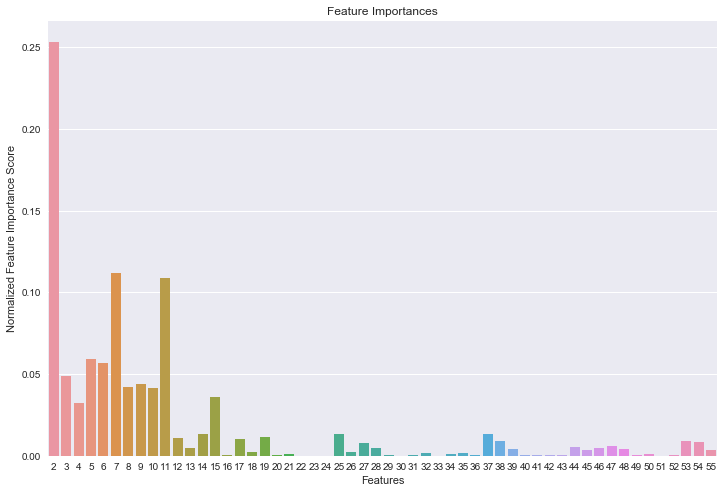

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot([i[1]+1 for i in feat_imp], [i[0] for i in feat_imp])
plt.title("Feature Importances");
plt.xlabel("Features")
plt.ylabel("Normalized Feature Importance Score");
fig.savefig("images/feature_importances")

____